# KNN

K-Nearest Neighbours is a *supervised learning* algorithm for both **classification** and **regression**.

For classification tasks, the algorithm predicts the class label for a new data point by looking at the majority class among its K nearest neighbors. The output then is calculated based on the mode (the most frequent class) among neighbors.

For regression tasks, the target value for a new data point is predicted by taking the average of the values of the K nearest neighbours. 

### What are the steps to implement KNN?


1) First, the dataset needs to be **splitted for training and testing**. 

2) Because the algorithm envolves calculating distances between points, **features need to be scaled** to ensure optimal performance.

3)  Initializing and training the KNN classifier.

4)  When making a prediction, KNN computes the distances between the test point and all training points, identifies the nearest neighbors, and calculates the prediction.

5) Test model's performance

6) If necessary tune hyperparameters, in this case the number of nearest neighbours, k

Let's start by creating synthetic data:

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Set parameters for the dataset
n_samples = 200  # Number of samples
n_features = 5   # Number of features (columns)
n_classes = 3    # Number of classes (for classification)
n_clusters_per_class = 1  # Controls the overlap

# Create synthetic dataset
X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_classes=n_classes,
                           n_clusters_per_class=n_clusters_per_class, 
                           random_state=42)

# Convert to DataFrame for easy handling
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, n_features + 1)])
data['target'] = y

# Show first few rows
data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.219731,-1.704947,-1.260905,-2.038125,-0.853233,2
1,-2.189652,2.994623,-0.621546,-1.534114,0.896373,0
2,-0.152415,-1.002541,-0.766994,-2.067442,-0.507145,0
3,0.578260,1.335947,1.435188,-0.646573,0.763527,1
4,-2.460978,0.463155,-2.433226,0.869606,-0.357646,2


In [2]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


### Splitting the dataset into training and testing sets.

The training set is used to 'teach' the model. From it, the algorithm learn the relationship between the features and the taget variables. The goal then is to deploy the model on unseen data. That's why you need a separate testing set: it helps you evaluate the performance of the model with data that hasn't been trained on, mimicking a real-world scenario.

Splitting the data when using KNN is necessary, just like with any other supervised learning algorithm for model evaluation, to
prevent overfitting and to tune hyperparameters.

But KNN does not explicitly "train" in the way many other algorithms do. KNN is what is called a 'lazy learner': instead of building a model by learning patterns from data and optimizing free parameters, the algorithm stores the entire training set for later use. 

In [3]:
# Split dataset into training and testing sets

X = data.drop(columns='target')
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Here, we use 70% of the data for training and 30% for testing.

Setting a *random_state value* ensures that every time you split the data, you get the same training and test sets, which is crucial for reproducibility, especially when tuning models. 

### Standardizing the features for optimal KNN performance.

**Why is important to standarize the data?**

In KNN, the model calculates the "distance" between data points to determine which points are "nearest" to each other. Having features with different ranges can skew the results.

Scaling the data ensures that all features contribute more equally to the distance metric by transforming them to a similar scale, typically with a **mean** of 0 and a **standard deviation** of 1.


In [4]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initializing and training the KNN classifier.

In [5]:
# Initialize and train the KNN classifier

knn = KNeighborsClassifier(n_neighbors=3)  # You can experiment with different values of 'k'
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### How to determine the number of nearest neighbours?

At this step, the number of nearest neighbors, $k$, has to be specified by the user. There are two common approaches for doing this. One is to start with a random number, keeping in mind what this parameter means and how it affects the algorithm's performance. When making a prediction, KNN selects the $k$ closest points to the test point.

If $k$ is too small, the model becomes highly sensitive to noise and outliers, capturing fine details of the training data (high variance, low bias). In this case, the model overfits and generalizes poorly to unseen data. On the other hand, if $k$ is too large, the model averages over many points, smoothing out local patterns. This leads to underfitting, as it may miss key details and generalizes poorly as well.

The optimal $k$ is one that balances this tradeoff, being large enough to reduce sensitivity to noise but small enough to preserve local structure in the data. Since $k$ represents the number of nearest neighbors, it should be a value between 1 and the total number of data points ($n$). A common rule of thumb is to choose $k = n$, where $n$ is the number of data points. 

The other, more reliable approach to determine empirically the optimal value of $k$ is to perform perform cross-validation, which  involves testing different values of $k$ on validation sets and selecting the one that minimizes the error, such as accuracy or RMSE, depending on the task.


### Making predictions and evaluating the model.

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.87      0.87      0.87        23
           2       0.89      0.81      0.85        21

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



#### Accuracy

Is proportion of correctly predicted instances out of all predictions:

$$
Accuracy = \frac{Number of correct predictions}{Total number of predictions}
$$
​
For binary classification, accuracy is a simple and effective metric. However, for multi-class classification (like in this case), it can sometimes be misleading if the class distribution is imbalanced (i.e., one class is overrepresented). In such cases, metrics like precision, recall, and F1-score are more insightful.

#### Precision

The proportion of true positive predictions out of all positive predictions made by the model.

$$
Precision = \frac{TP}{TP + FP}
​$$
 
Where TP stands for *true positives* (correctly predicted positive class instances) and FP stands for *false positives* (instances incorrectly predicted as positive)

#### Recall (Sensitivity)

The proportion of true positive predictions out of all actual positive instances in the data.

$$
Recall = \frac{TP}{TP + FN}
$$
​
 
Where FN stands for *false negatives* (instances incorrectly predicted as negative)

#### F1-Score

The harmonic mean of precision and recall, offering a balance between the two when there is a trade-off between precision and recall. F1 score goes from 0 to 1, 1 being perfect precision and recall.

$$
F1=2×\frac{Precision×Recall}{Precision+Recall}
$$
​
 
#### Support

The number of actual occurrences of each class in the dataset (i.e., how many samples belong to each class).

#### Confusion Matrix

A confusion matrix shows the breakdown of predictions across all classes. It’s a powerful tool for visualizing where the model is making errors. For multi-class classification, the confusion matrix is a square matrix where:

*   Rows represent actual classes (true labels).

*   Columns represent predicted classes.

Each element in the matrix indicates how many samples from the true class were predicted as the corresponding class.

In [7]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.87      0.87      0.87        23
           2       0.89      0.81      0.85        21

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



*   An **accuracy** of 0.8 means that in 80% of the cases the predictions were correct (the algorithm predicted the right label). This means that the model has a high overall accuracy. But, like it was already mentioned, this permormance metric has it's limitations in the case of multi-label classification: for instance, if class 2 is overrepresented, the model might guess "class 2" often, inflating accuracy even if it performs poorly on other classes. That's why it is better to look at the other metrics. In summary, it tells yu how well the model performs overall but doesn't tell you how it performs for each class individually

* **Precision** of 0.89 for class 2 means that in those cases in which the predicted label was '2', 89% of the times it was correct.

*   **Recall** of 0.81 for class 2 means that 81% of the actual class 2 were correctly identified by the model

*   An F1 score of 0.85 for class 2 means that the model has a balanced performance for the class, combining both precision and recall 

* To sum up: high precision for a class means that every time you predict that class, most of the times is correct. In other words the model has high accuracy for that particular class. High recall means that the model is fairly good recognizing a particular class


#### To have in mind:

*   High Precision and Low Recall: The model is making fewer but more accurate positive predictions (good for when false positives are costly).

*   High Recall and Low Precision: The model is catching most of the positive samples but also making many incorrect predictions (good for when false negatives are costly).

*   Balanced Precision and Recall: This is usually ideal. The F1-score will reflect a balance between both metrics

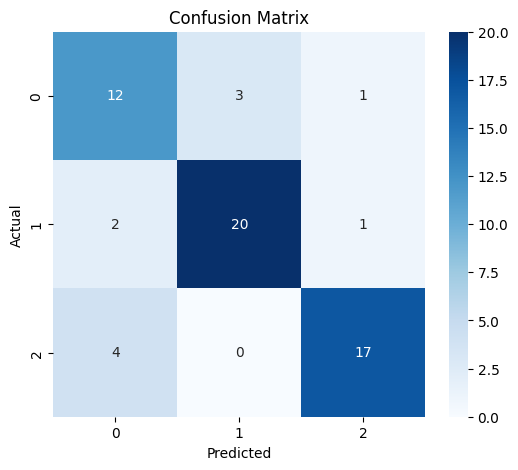

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


*   The values in the diagonal are the TP

*   The values on the same column (out of the diagonal) are the FP

*   The values on the same row (out of the diagonal) are the FN

### Hyperparameter tunning


Tuning the hyperparameter K is essential because it directly impacts the model's performance. A small K might make the model too sensitive to noise, while a large K can make the model too generalized.

Smaller K values capture more local patterns, which may be useful if classes are closely packed. Larger K values capture broader patterns, potentially better for generalization.

#### Steps to tune K

1)  Define the range of values for K: depend on the size of the dataset, usually between 1 and 20

2)  Cross-Validation: For each K perform cross-validation to estimate the model’s accuracy. 

3)  Plot and Select Optimal K

We use cross_val_score to perform 5-fold cross-validation, scoring based on accuracy. This gives us an average accuracy for each K, stored in cv_accuracies.

Optimal k: 12


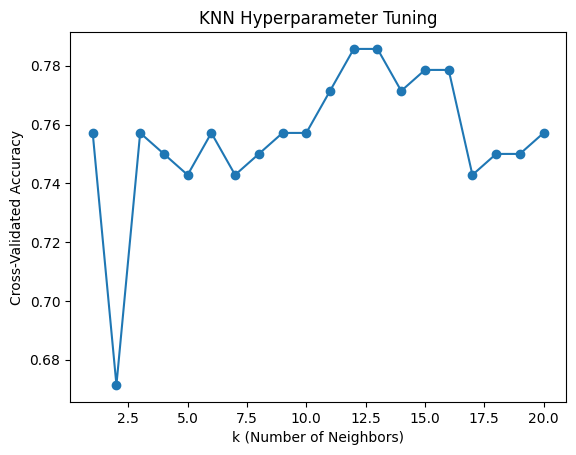

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define the range for k values
k_values = range(1, 21)

# Store cross-validated accuracies for each k
cv_accuracies = []

# Loop over each k and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and get the average accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracies.append(scores.mean())

# Find the optimal k (the one with the highest accuracy)
optimal_k = k_values[np.argmax(cv_accuracies)]
print(f"Optimal k: {optimal_k}")

# Plotting k values vs. cross-validated accuracy
plt.plot(k_values, cv_accuracies, marker='o', linestyle='-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()
